In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
ad_data = pd.read_csv('C:\\Users\\AnkushAnkush2\\PycharmProjects\\pythonProject\\DataAnalytics\\Input\\titanic_train.csv')
df=pd.DataFrame(ad_data)
print(ad_data.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


Text(0.5, 0, 'Age')

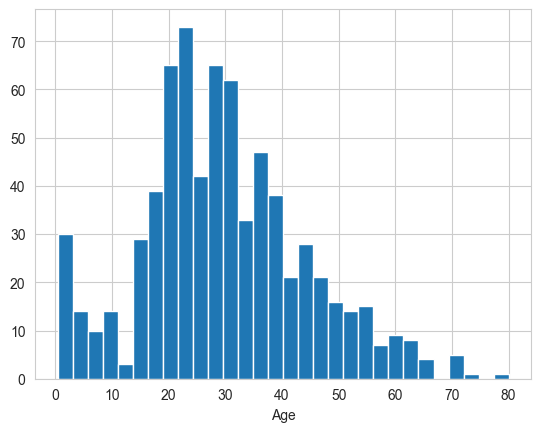

In [6]:
sns.set_style('whitegrid')
ad_data['Age'].hist(bins=30)
plt.xlabel('Age')

<Axes: xlabel='Survived', ylabel='count'>

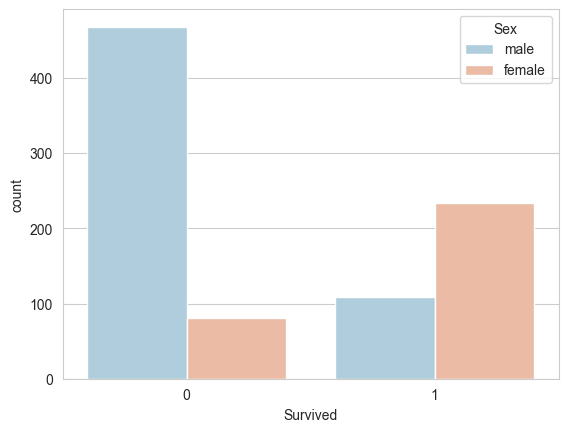

In [7]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue='Sex',data=ad_data,palette='RdBu_r')

In [112]:
mean_age=df['Age'].mean()
print(mean_age)

29.69911764705882


<Axes: xlabel='Survived', ylabel='count'>

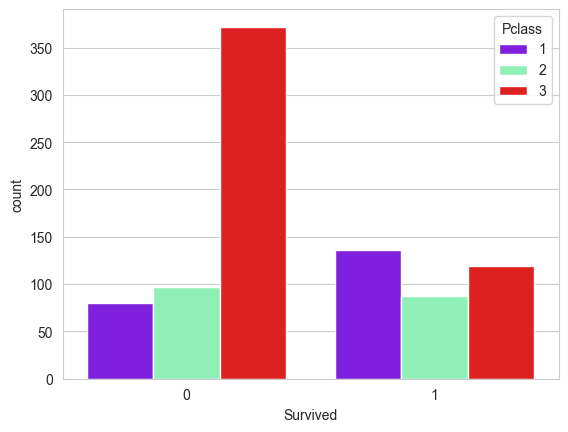

In [113]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=ad_data,palette='rainbow')

In [114]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [115]:
ad_data['Age'] = ad_data[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\AnkushAnkush2\AppData\Local\Temp\ipykernel_20824\822839471.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\AnkushAnkush2\AppData\Local\Temp\ipykernel_20824\822839471.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

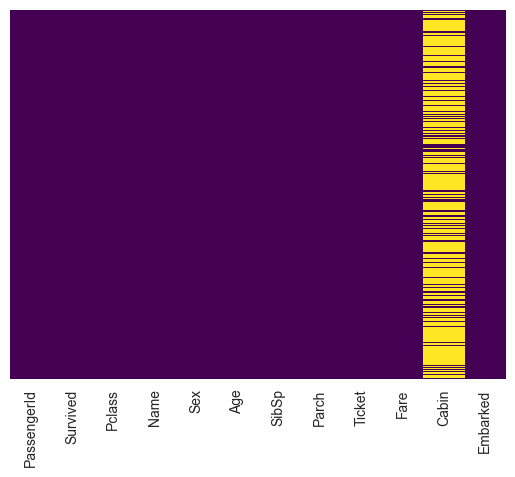

In [116]:
sns.heatmap(ad_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [117]:
ad_data.drop('Cabin',axis=1,inplace=True)

In [118]:
ad_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [119]:
ad_data.dropna(inplace=True)

In [120]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [121]:
sex = pd.get_dummies(ad_data['Sex'],drop_first=True)
embark = pd.get_dummies(ad_data['Embarked'],drop_first=True)

In [122]:
ad_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [123]:
ad_data = pd.concat([ad_data,sex,embark],axis=1)

In [124]:
ad_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [127]:
from sklearn.model_selection import train_test_split

In [129]:
X_train, X_test, y_train, y_test = train_test_split(ad_data.drop('Survived',axis=1), 
                                                    ad_data['Survived'], test_size=0.30, 
                                                    random_state=101)

In [130]:
from sklearn.linear_model import LogisticRegression

In [131]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

c:\Users\AnkushAnkush2\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [133]:
predictions=logmodel.predict(X_test)

In [132]:
from sklearn.metrics import classification_report

In [134]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       163
           1       0.84      0.64      0.73       104

    accuracy                           0.81       267
   macro avg       0.82      0.78      0.79       267
weighted avg       0.82      0.81      0.81       267

